In [145]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [146]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [147]:
df = df.iloc[:, 1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
encoder = LabelEncoder()

In [150]:
df['Species'] = encoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [151]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

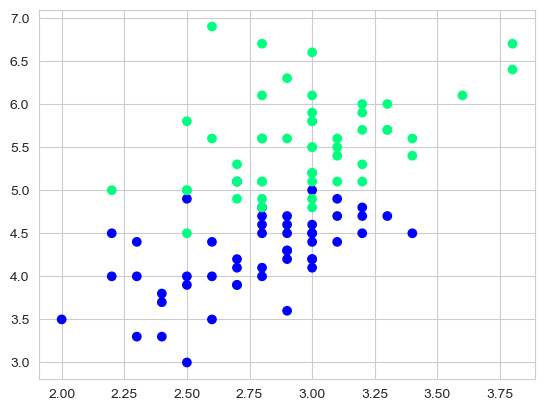

In [153]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

#### Taking only 10 rows for training

In [154]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [155]:
df_train

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
71,2.8,4.0,1
145,3.0,5.2,2
86,3.1,4.7,1
114,2.8,5.1,2
77,3.0,5.0,1
63,2.9,4.7,1
56,3.3,4.7,1
92,2.6,4.0,1
80,2.4,3.8,1


In [156]:
df_val

,SepalWidthCm,PetalLengthCm,Species
81,2.4,3.7,1
112,3.0,5.5,2
102,3.0,5.9,2
120,3.2,5.7,2
51,3.2,4.5,1


In [157]:
df_test

,SepalWidthCm,PetalLengthCm,Species
139,3.1,5.4,2
87,2.3,4.4,1
106,2.5,4.5,2
136,3.4,5.6,2
101,2.7,5.1,2


In [158]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [159]:
X_test

array([[2.4, 3.7],
       [3. , 5.5],
       [3. , 5.9],
       [3.2, 5.7],
       [3.2, 4.5]])

In [160]:
y_test

array([1, 2, 2, 2, 1])

### evaluate func

In [161]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Case 1 - Bagging

In [162]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
80,2.4,3.8,1
145,3.0,5.2,2
77,3.0,5.0,1
80,2.4,3.8,1
114,2.8,5.1,2
78,2.9,4.5,1
78,2.9,4.5,1


In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [164]:
dt_bag1 = DecisionTreeClassifier()

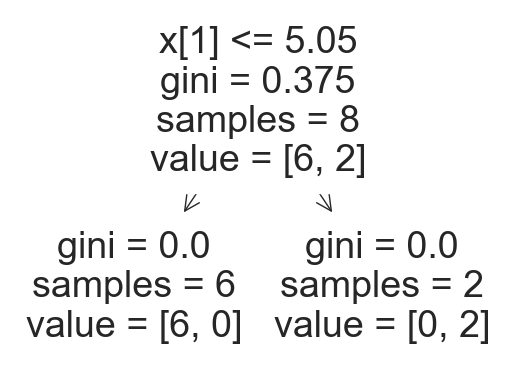

1.0


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


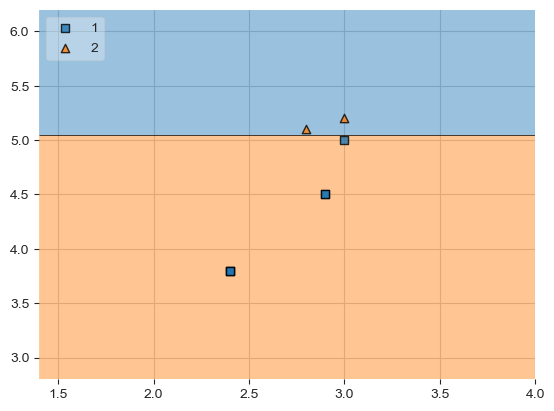

In [165]:
evaluate(dt_bag1,X,y)

In [166]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
56,3.3,4.7,1
77,3.0,5.0,1
92,2.6,4.0,1
145,3.0,5.2,2
77,3.0,5.0,1
71,2.8,4.0,1
56,3.3,4.7,1


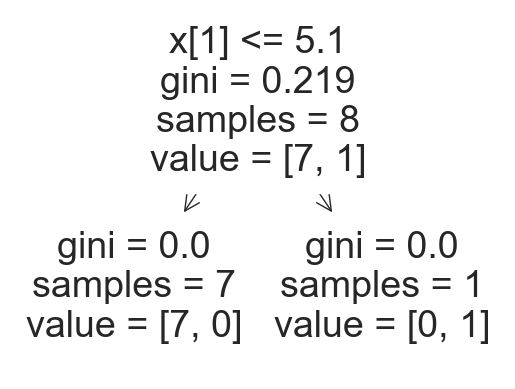

1.0


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


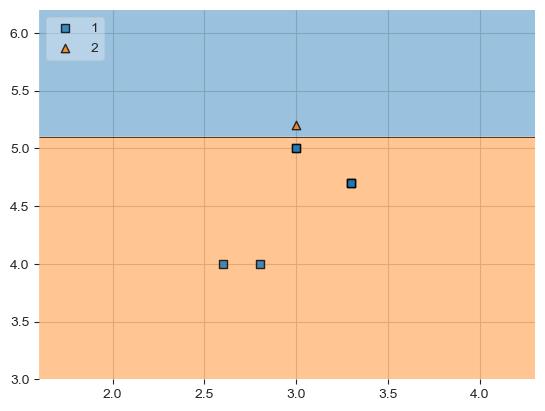

In [167]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [168]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
86,3.1,4.7,1
77,3.0,5.0,1
78,2.9,4.5,1
78,2.9,4.5,1
114,2.8,5.1,2
80,2.4,3.8,1
78,2.9,4.5,1


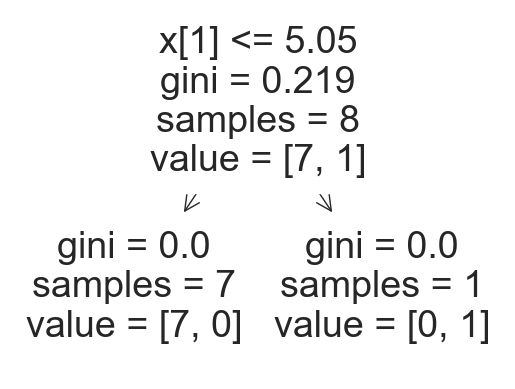

1.0


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


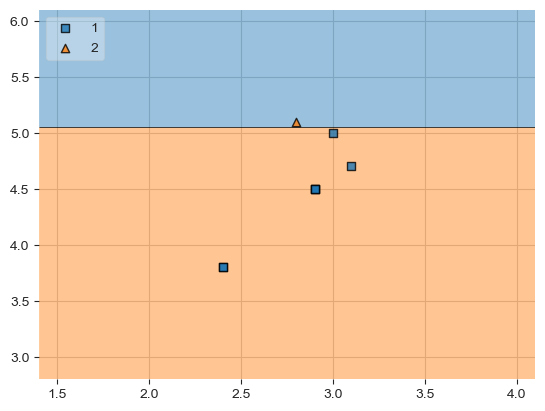

In [169]:

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [170]:
df_test

,SepalWidthCm,PetalLengthCm,Species
139,3.1,5.4,2
87,2.3,4.4,1
106,2.5,4.5,2
136,3.4,5.6,2
101,2.7,5.1,2


In [171]:
print("Predictor 1",dt_bag1.predict(np.array([2.6,5.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.6,5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.6,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [172]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
71,2.8,4.0,1
145,3.0,5.2,2
86,3.1,4.7,1
114,2.8,5.1,2
77,3.0,5.0,1
63,2.9,4.7,1
56,3.3,4.7,1
92,2.6,4.0,1
80,2.4,3.8,1


In [173]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
63,2.9,4.7,1
56,3.3,4.7,1
86,3.1,4.7,1
77,3.0,5.0,1
80,2.4,3.8,1
145,3.0,5.2,2
71,2.8,4.0,1


 # Random Subspaces

In [175]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [176]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
19,20,5.1,3.8,1.5,0.3,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
26,27,5.0,3.4,1.6,0.4,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica


In [177]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,PetalWidthCm
19,5.1,0.3
146,6.3,1.9
55,5.7,1.3
94,5.6,1.3
0,5.1,0.2
61,5.9,1.5
26,5.0,0.4
52,6.9,1.5
93,5.0,1.0
108,6.7,1.8


# Random Patches

In [178]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
19,20,5.1,3.8,1.5,0.3,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
26,27,5.0,3.4,1.6,0.4,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica


In [180]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalLengthCm,SepalLengthCm
55,4.5,5.7
26,1.6,5.0
108,5.8,6.7
0,1.4,5.1
94,4.2,5.6
26,1.6,5.0
55,4.5,5.7
93,3.3,5.0
